# Beispiele mit Jupyter Notebooks

## Was kann Jupyter Notebook?
Jupyter Notebook kann Daten, Code und erklärenden Text an nur einem Ort bündeln.

## Text in Jupyter Notebook
Der Text in Jupyter notebook ist in Markdown geschrieben, kann viele Dinge darstellen.

# Darstellung von Code in Jupyter Notebook

## Beispiel 1: Daten erzeugen und plotten
In diesem Beispiel wird ein 2D-Gauss-Profil generiert und geplottet.

### Benötigte Bibliotheken

In [1]:
import matplotlib.pyplot as plt
import numpy as np # fuer schnelles Bauen von arrays mit Funktionswerten
import random

### Erzeugung der Daten
Es werden zwei Arrays erzeugt. Im array x ist das Gauss-Profil in x-Richtung gespeichert, im array y entsprechend in y-Richtung.

In [2]:
n_samples = int(1e5)
x = np.random.normal(0,200,n_samples)
y = np.random.normal(0,200,n_samples)

### Plotten der Daten als 2D-Histogramm mit colorbar

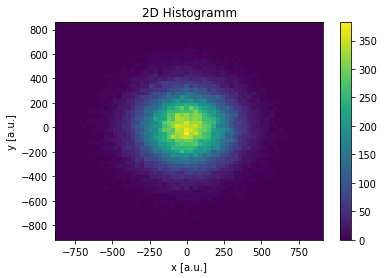

In [3]:
hists = plt.hist2d(x, y, bins=60)
plt.title("2D Histogramm")
plt.xlabel("x [a.u.]")
plt.ylabel("y [a.u.]")
plt.colorbar()
plt.show()

## Fitten des Profils
Jetzt sollen beide dimensionen des Profils gefitted werden

### Benötigte Pakete
Zusätzlich zu den bisher eingebundenen Paketen benötigen wir:

In [4]:
from scipy.optimize import curve_fit

### Definition der Modellfunktion
Hier muss die Modellfunktion definiert werden. Der erste Parameter der Funktion muss immer die Variable sein, anschließend die Fitparameter.

In [5]:
def gauss(x,a,mu,sigma):
    exponent = - (x-mu)**2 / (2 * sigma**2)
    return a * np.exp(exponent)

## Fitten der Histogramme aus dem hist2d

In [6]:
x_hist = plt.hist(x,bins=300)
plt.clf()
y_hist = plt.hist(y,bins=300)
plt.clf()
plt.close()

opt_x, cov_x = curve_fit(gauss,x_hist[1][:-1],x_hist[0],p0=[200,0,200])
opt_y, cov_y = curve_fit(gauss,y_hist[1][:-1],y_hist[0],p0=[200,0,200])

### Plotten von Histogrammen und Fits

In [7]:
x_fit = gauss(x_hist[1][:-1],opt_x[0],opt_x[1],opt_x[2])
y_fit = gauss(y_hist[1][:-1],opt_y[0],opt_y[1],opt_y[2])

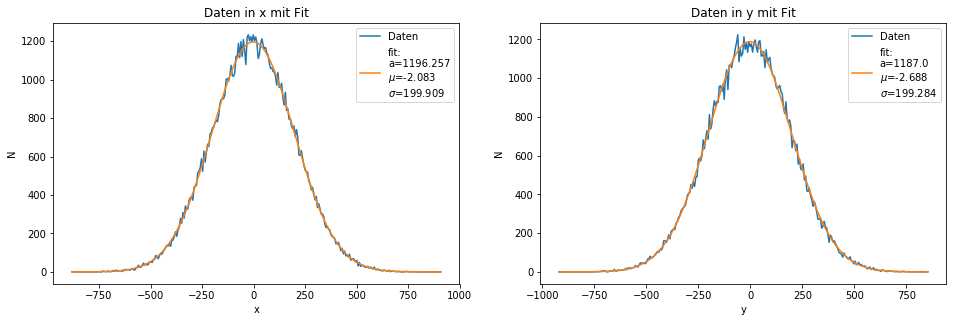

In [8]:
plt.figure(figsize=(16,4.8))
plt.subplot(121)
plt.plot(x_hist[1][:-1],x_hist[0],label='Daten')
fitlabel = "fit:\na={}\n$\\mu$={}\n$\\sigma$={}".format(round(opt_x[0],3),round(opt_x[1],3),round(opt_x[2],3))
plt.plot(x_hist[1][:-1],x_fit,label=fitlabel)
plt.title("Daten in x mit Fit")
plt.xlabel("x")
plt.ylabel("N")
plt.legend()
plt.subplot(122)
plt.plot(y_hist[1][:-1],y_hist[0],label='Daten')
fitlabel = "fit:\na={}\n$\\mu$={}\n$\\sigma$={}".format(round(opt_y[0],3),round(opt_y[1],3),round(opt_y[2],3))
plt.plot(y_hist[1][:-1],y_fit,label=fitlabel)
plt.title("Daten in y mit Fit")
plt.xlabel("y")
plt.ylabel("N")
plt.legend()
plt.show()